#### Import required Liberaries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Data

In [25]:
raw_data = pd.read_csv('E:/INSAID/Fraud.csv')

# Data Exploration and Cleaning in Step 


 ### 1. Discover Row and Column information of the dataset

In [46]:
print('Number of Rows: {}'.format(raw_data.shape[0]))
print('Number of Columns: {}'.format(raw_data.shape[1]))
print('Comumns: {}'.format(raw_data.columns))

Number of Rows: 6362620
Number of Columns: 11
Comumns: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


### 3. Check the columens with the Given Dictionary(Definition of each Variable) 

In [49]:
#the dictionary represents definitions of each variable
with open('E:/INSAID/Data Dictionary.txt') as text_file:
    Dictionary = text_file.read()
print(Dictionary)

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to anot

### 2. Data Type Discovery

In [48]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


 **==> Check for the datatypes object in variables type, nameOrig, nameDest have consists of same data type**

In [78]:
(raw_data['type'].map(type) != str).values.any()

False

In [81]:
(raw_data['nameOrig'].map(type) != str).values.any()

False

In [79]:
(raw_data['nameDest'].map(type) != str).values.any()

False

* **NB:** The above result shows all of attributs of object data type has consistent data type. 

### Check Duplicated Data

In [84]:
raw_data.duplicated().sum()

0

**=> No Duplicated data found**

In [86]:
raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 4.Observe and Handel Missing Values in the dataset (Column-wise)

* **Exploration Numerical Values  ==>** 

In [67]:
raw_data.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [73]:
x=raw_data.isna().sum()
print(x)
raw_data.isna().mean()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [62]:
raw_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


* **Note:- Here from the result we can observe that there is no missed value from the data set**
**No NaN values to fill*

#### Handling outliers
* Using Quartile Range Calculation 

In [68]:
Q1 = raw_data.quantile(0.25)
Q3 = raw_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

step              1.790000e+02
amount            1.953319e+05
oldbalanceOrg     1.073152e+05
newbalanceOrig    1.442584e+05
oldbalanceDest    9.430367e+05
newbalanceDest    1.111909e+06
isFraud           0.000000e+00
isFlaggedFraud    0.000000e+00
dtype: float64


### Get fraud ratio

In [126]:
fraud = raw_data['isFraud'].value_counts()
fraud_ratio = fraud/len(raw_data.index)
fraud
FlaggedFraud = raw_data['isFlaggedFraud'].value_counts()
FlaggedFraud

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

* fraud vs not fraud bar plot for more visualization (in thousands)

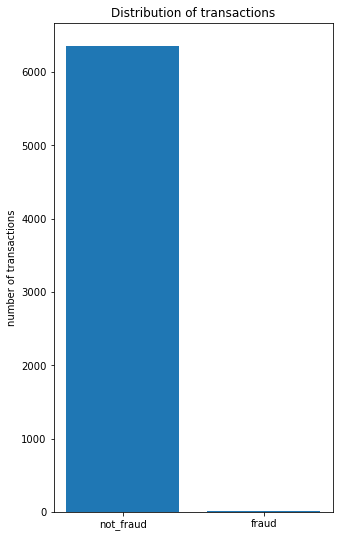

In [119]:
nf_plot = plt.figure(figsize=(5,9))
plt.bar(['not_fraud','fraud'],fraud.values/1000)
plt.title('Distribution of transactions')
plt.ylabel('number of transactions')
plt.show()

In [120]:
fraud_transaction = raw_data[raw_data['isFraud'] == 1]['type'].value_counts()
fraud_transaction

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [111]:
fraud_transactions = []
for i in ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT' ]:
    try:
        fraud_transactions.append(fraud_transaction[i])
    except:
        fraud_transactions.append(0)
        
print(fraud_transactions)

[4116, 0, 0, 4097, 0]


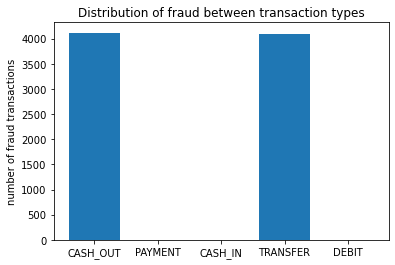

In [113]:
tf_plot = plt.figure()
plt.bar(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT' ],fraud_transactions)
plt.title('Distribution of fraud between transaction types')
plt.ylabel('number of fraud transactions')
plt.show()

the fraud examples are equally distributed betwenn the types 'CASH_OUT', 'TRANSFER' but other transaction types do not contain any fraudulent transactions. this show that fraudulent transactions are only occuring within transaction types CASH_OUT and TRANSFER.

this conveys that transaction types other than 'CASH_OUT', 'TRANSFER' have no relevence to fraud transactions, so examples with these types can be removed before training data. the algorithm if would if transaction type not 'CASH_OUT', 'TRANSFER' not fraudulent transaction else run the data into machine learning model to predict wether the transaction is fraud or not

In [121]:
raw_data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

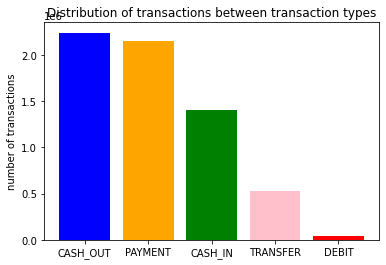

In [123]:
# plot of transaction type distribution
plot = plt.figure()
plt.bar(raw_data['type'].value_counts().index,raw_data['type'].value_counts().values, color = ['blue','orange','green','pink','red'])
plt.title('Distribution of transactions between transaction types')
plt.ylabel('number of transactions')
plt.show()

* **cash out is the most used transaction type**
* **debit s the least used transaction type**

* Caculate the expected frauds per 1000 transaction for each "type"

In [114]:
(fraud_transaction/raw_data['type'].value_counts()[['CASH_OUT','TRANSFER']])*1000

CASH_OUT    1.839553
TRANSFER    7.687992
Name: type, dtype: float64

The result shows that more fraud transactions are occure due to TRANSFER than CASH_OUT and the rate per thausand is aproximatly 8 and 2 frauds respectivelly.

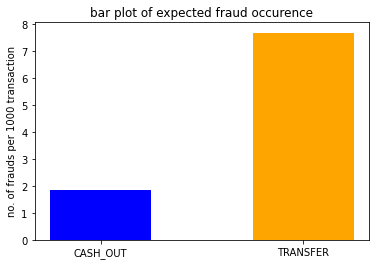

In [117]:
tf_plot = plt.figure()
plt.bar((fraud_transaction/raw_data['type'].value_counts()[['CASH_OUT','TRANSFER']]).index,(fraud_transaction/raw_data['type'].value_counts()[['CASH_OUT','TRANSFER']]).values*1000, color = ['blue','orange'], width = 0.5)
plt.title('bar plot of expected fraud occurence')
plt.ylabel('no. of frauds per 1000 transaction')
plt.show()

In [127]:
raw_data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [118]:
raw_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Data Preparation(Training) 